<a href="https://colab.research.google.com/github/Singularitty/AdvancedMachineLearning/blob/main/Assignment7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem Automática Avançada
## Assignment 7 - Time Series
### Luís Ferreirinha Nº51127
### Christopher Anaya Nº60566

## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## LSTM Model

### i) Clean, No noise

We start by creating a time series using a sinusoidal function

In [87]:
periods = 100
points_per_period = 50
lag = 12
data = np.sin(np.linspace(0, 2*np.pi*periods, num=periods*points_per_period))

x, y = [], []
for i in range(lag, data.shape[0]-1):
  x.append(data[i-lag:i])
  y.append(data[i])

y = np.array(y)
x_lstm = np.expand_dims(x, axis=2)

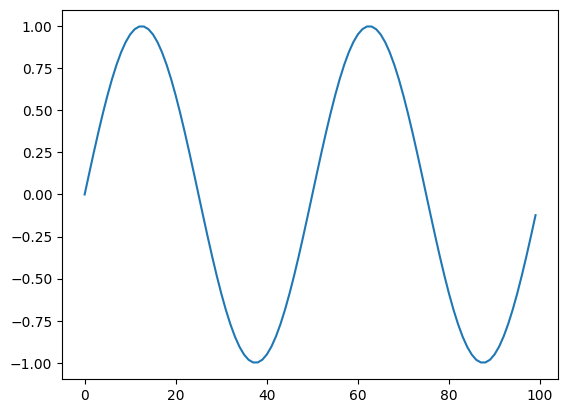

In [3]:
plt.plot(data[:100])

Now we create a LSTM model according to the provided tutorial

In [58]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [61]:
lstm_model.fit(x=x_lstm[:2400], 
               y=y[:2400], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0409
Epoch 2/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0050
Epoch 3/5
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0036
Epoch 4/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0021
Epoch 5/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0017


In [62]:
predictions = lstm_model(x_lstm[2400:2500])
print("Mean Squared Error:", mean_squared_error(y[2400:2500], predictions))

Mean Squared Error: 0.000869741372002221


Fit the rest of the points

In [70]:
lstm_model.fit(x=x_lstm[2400:4900], 
               y=y[2400:4900], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2500/2500 [==============================] - 9s 4ms/step - loss: 6.2207e-04
Epoch 2/5
2500/2500 [==============================] - 9s 4ms/step - loss: 5.7519e-04
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 5.3545e-04
Epoch 4/5
2500/2500 [==============================] - 9s 3ms/step - loss: 4.9310e-04
Epoch 5/5
2500/2500 [==============================] - 10s 4ms/step - loss: 4.6387e-04


In [71]:
predictions = lstm_model(x_lstm[4900:5000])
print("Mean Squared Error:", mean_squared_error(y[4900:5000], predictions))

Mean Squared Error: 0.0007622606073544614


As we can see after the burn-in period the MSE decreased. The difference isn't substancial because the time series follows a predictable sinusiodal function, so most of the time series pattern was learned by the network during the burn-in period.

### ii) With noise

In [73]:
periods = 100
points_per_period = 50
lag = 12
data = np.sin(np.linspace(0, 2*np.pi*periods, num=periods*points_per_period))
noise = np.random.normal(0, 0.05, len(data))
data_noisy = data + noise
scaler = MinMaxScaler(feature_range=(-1,1))
data_noisy = scaler.fit_transform(np.reshape(data_noisy, (-1,1))).reshape(1,5000)[0]

x, y = [], []
for i in range(lag, data_noisy.shape[0]-1):
  x.append(data_noisy[i-lag:i])
  y.append(data_noisy[i])

y_noisy = np.array(y)
x_noisy = np.expand_dims(x, axis=2)

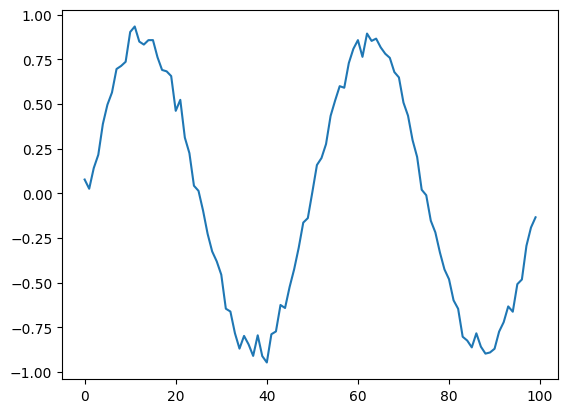

In [33]:
plt.plot(data_noisy[:100])

In [74]:
lstm_model_ii = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model_ii.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [75]:
lstm_model_ii.fit(x=x_noisy[:2400], 
               y=y_noisy[:2400], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0259
Epoch 2/5
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0049
Epoch 3/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0038
Epoch 4/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 5/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0032


In [76]:
predictions = lstm_model_ii(x_noisy[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_noisy[2400:2500], predictions))

Mean Squared Error: 0.005025739391053876


Fit the rest of the points

In [77]:
lstm_model_ii.fit(x=x_noisy[2400:4900], 
               y=y_noisy[2400:4900], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0034
Epoch 2/5
2500/2500 [==============================] - 9s 3ms/step - loss: 0.0033
Epoch 3/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 4/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0032
Epoch 5/5
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0031


In [78]:
predictions = lstm_model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

Mean Squared Error: 0.0030767165968606795


Again we see a decrease in the MSE, but this time the decrease is more substantial.  

Since this dataset contains noise, random deviations from the expected sinusoidal shape, the network as a harder time learning this pattern (which is impossible to fully learn if the deviations are trully random). As such a burn-in period allows the network to somewhat compensate for the random deviations by relying on historical data, resulting in a higher decrease of the MSE when compared to the sinusoidal without noise.

## Focused time-lagged feedforward network

We now create a focused time-lagged feedfoward network based on the tutorial provided. This model will have an input layer and a hidden layer and a output layer with one neuron, both input and hidden layers will have the same number of neurons as the lag in the time series.

#### i) No Noise

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(lag, activation='relu', input_dim=x_lstm.shape[1]),
    tf.keras.layers.Dense(1),
])
model.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [88]:
model.fit(x=x_lstm[:2400], 
               y=y[:2400], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0319
Epoch 2/5
2400/2400 [==============================] - 7s 3ms/step - loss: 0.0042
Epoch 3/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 4/5
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0026
Epoch 5/5
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0017


In [90]:
predictions = model(x_lstm[2400:2500])
print("Mean Squared Error:", mean_squared_error(y[2400:2500], predictions))

Mean Squared Error: 0.0036946489535070993


Fit the rest of the points

In [91]:
model.fit(x=x_lstm[2400:4900], 
               y=y[2400:4900], 
               batch_size=5, 
               epochs=5,
               shuffle=False)

Epoch 1/5
500/500 [==============================] - 2s 3ms/step - loss: 1.3009e-04
Epoch 2/5
500/500 [==============================] - 2s 4ms/step - loss: 7.1493e-06
Epoch 3/5
500/500 [==============================] - 2s 4ms/step - loss: 5.0761e-06
Epoch 4/5
500/500 [==============================] - 2s 4ms/step - loss: 2.8855e-06
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 7.0632e-05


In [92]:
predictions = model(x_lstm[4900:5000])
print("Mean Squared Error:", mean_squared_error(y[4900:5000], predictions))

Mean Squared Error: 6.911094642692783e-07


For this model we can see that the burn-in period allowed the network to significantly decrease the MSE.  

When compared to the LSTM we see a much lower MSE, this is most likely because the MLP architecture is more appropriate for predicting the output of a sinusoidal function without any noise, instead of capturing the time dependecies it is capturing the pattern of the sinusoidal function.

#### ii) With Noise

In [39]:
model_ii = tf.keras.models.Sequential([
    tf.keras.layers.Dense(lag, activation='relu', input_dim=x_lstm.shape[1]),
    tf.keras.layers.Dense(1),
])
model_ii.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [79]:
model_ii.fit(x=x_noisy[:2400], 
               y=y_noisy[:2400], 
               batch_size=1, 
               epochs=5,
               shuffle=False)

Epoch 1/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0062
Epoch 2/5
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0054
Epoch 3/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0050
Epoch 4/5
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0047
Epoch 5/5
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0043


In [80]:
predictions = model_ii(x_noisy[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_noisy[2400:2500], predictions))

Mean Squared Error: 0.004718899036919223


Fit the rest of the points

In [82]:
model_ii.fit(x=x_noisy[2400:4900], 
               y=y_noisy[2400:4900], 
               batch_size=5, 
               epochs=5,
               shuffle=False)

Epoch 1/5
500/500 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 2/5
500/500 [==============================] - 2s 3ms/step - loss: 0.0031
Epoch 3/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 4/5
500/500 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 5/5
500/500 [==============================] - 2s 3ms/step - loss: 0.0030


In [83]:
predictions = model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

Mean Squared Error: 0.0032063528881210853


As expected when we add noise, the time-lagged feedfoward network does substantially decrease the MSE after the burn-in period.  

This is expected as this type of network does not do so well when noise is introduced, since when compared to LSTM it lakc s gating mechanisms to filter out noise.

## Problem 2

For this problem we will use a autoregression model which we wil define as a function that uses the previous three values of an input list to compute the next value.

In [44]:
def autoregression_model(serie):
  t = len(serie)
  return 0.6*serie[t-1] - 0.54*serie[t-2] - 0.44*serie[t-3] + np.random.normal(0, 0.01)

In [93]:
periods = 100
points_per_period = 50
lag = 12
data = [5,6,3]
for x in range(5000-3):
  data.append(autoregression_model(data))

scaler = MinMaxScaler(feature_range=(-1,1))
data = scaler.fit_transform(np.reshape(data, (-1,1))).reshape(1,5000)[0]

x, y = [], []
for i in range(lag, len(data)-1):
  x.append(data[i-lag:i])
  y.append(data[i])

y_auto = np.array(y)
x_auto = np.expand_dims(x, axis=2)

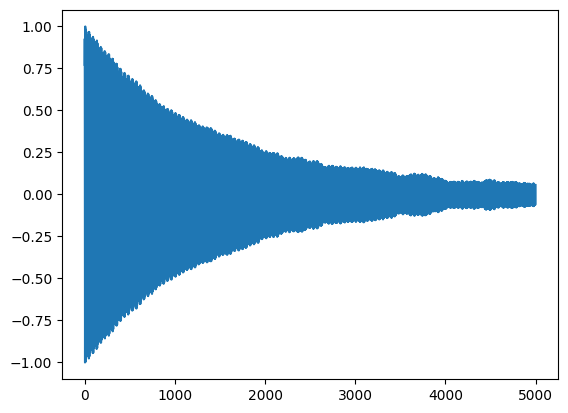

In [47]:
plt.plot(data)

A quick look at the data allows us to conclude that as the time series progresses, the previous points of the series stop being so influencial and the noise starts becoming the dominating factor in the series.

### LSTM Model

In [94]:
lstm_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer((lag,1)),
    tf.keras.layers.LSTM(10, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='tanh')
])

lstm_model_2.compile(optimizer='adam', loss='mse')

Fit first 2400 samples

In [95]:
lstm_model_2.fit(x=x_auto[:2400], 
               y=y_auto[:2400], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0427
Epoch 2/50
2400/2400 [==============================] - 9s 4ms/step - loss: 9.5281e-04
Epoch 3/50
2400/2400 [==============================] - 9s 4ms/step - loss: 7.4449e-04
Epoch 4/50
2400/2400 [==============================] - 10s 4ms/step - loss: 6.1088e-04
Epoch 5/50
2400/2400 [==============================] - 11s 5ms/step - loss: 5.0618e-04
Epoch 6/50
2400/2400 [==============================] - 9s 4ms/step - loss: 4.2994e-04
Epoch 7/50
2400/2400 [==============================] - 9s 4ms/step - loss: 3.8831e-04
Epoch 8/50
2400/2400 [==============================] - 9s 4ms/step - loss: 3.7302e-04
Epoch 9/50
2400/2400 [==============================] - 9s 4ms/step - loss: 3.6633e-04
Epoch 10/50
2400/2400 [==============================] - 11s 5ms/step - loss: 3.5734e-04
Epoch 11/50
2400/2400 [==============================] - 10s 4ms/step - loss: 3.4442e-04
Epoch 12/50
2400/2400 [=================

In [96]:
predictions = lstm_model_2(x_auto[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_auto[2400:2500], predictions))

Mean Squared Error: 1.7794806614973964e-05


Fit the rest of the points

In [97]:
lstm_model_2.fit(x=x_auto[2400:4900], 
               y=y_auto[2400:4900], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4840e-05
Epoch 2/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.5086e-05
Epoch 3/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.4228e-05
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.3191e-05
Epoch 5/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.2348e-05
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 1.1675e-05
Epoch 7/50
2500/2500 [==============================] - 11s 4ms/step - loss: 1.1007e-05
Epoch 8/50
2500/2500 [==============================] - 9s 4ms/step - loss: 1.0280e-05
Epoch 9/50
2500/2500 [==============================] - 9s 4ms/step - loss: 9.5689e-06
Epoch 10/50
2500/2500 [==============================] - 9s 4ms/step - loss: 8.9290e-06
Epoch 11/50
2500/2500 [==============================] - 9s 4ms/step - loss: 8.3696e-06
Epoch 12/50
2500/2500 [================

In [98]:
predictions = lstm_model_ii(x_noisy[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_noisy[4900:5000], predictions))

Mean Squared Error: 0.0030767165968606795


As we mentioned previously the latter points in the time series will be more heavily dominated by the noise factor. So this increase in the MSE is expected, as the network relies on historical data to predict the points, and these points are more influced by random noise than the previous values of the series.

But for the other points 2400-2500, we get much better results. Since these are mostly determined by the previous values and not random noise, the LSTM model copes well with this by relying on historical data.

### Focused time-lagged feedforward network

In [53]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(lag, activation='relu', input_dim=x_lstm.shape[1]),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss="mean_squared_error", optimizer='adam')

Fit first 2400 samples

In [54]:
model_2.fit(x=x_auto[:2400], 
               y=y_auto[:2400], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2400/2400 [==============================] - 6s 2ms/step - loss: 0.0225
Epoch 2/50
2400/2400 [==============================] - 6s 2ms/step - loss: 1.4906e-04
Epoch 3/50
2400/2400 [==============================] - 6s 2ms/step - loss: 1.1134e-04
Epoch 4/50
2400/2400 [==============================] - 8s 3ms/step - loss: 1.4929e-04
Epoch 5/50
2400/2400 [==============================] - 6s 3ms/step - loss: 9.8408e-05
Epoch 6/50
2400/2400 [==============================] - 6s 3ms/step - loss: 1.0678e-04
Epoch 7/50
2400/2400 [==============================] - 5s 2ms/step - loss: 8.6076e-05
Epoch 8/50
2400/2400 [==============================] - 6s 2ms/step - loss: 7.9135e-05
Epoch 9/50
2400/2400 [==============================] - 5s 2ms/step - loss: 8.2758e-05
Epoch 10/50
2400/2400 [==============================] - 6s 2ms/step - loss: 7.9438e-05
Epoch 11/50
2400/2400 [==============================] - 6s 2ms/step - loss: 7.8928e-05
Epoch 12/50
2400/2400 [======================

In [55]:
predictions = model_2(x_auto[2400:2500])
print("Mean Squared Error:", mean_squared_error(y_auto[2400:2500], predictions))

Mean Squared Error: 6.951339802740443e-06


Fit the rest of the points

In [56]:
model_2.fit(x=x_auto[2400:4900], 
               y=y_auto[2400:4900], 
               batch_size=1, 
               epochs=50,
               shuffle=False)

Epoch 1/50
2500/2500 [==============================] - 6s 2ms/step - loss: 9.0037e-06
Epoch 2/50
2500/2500 [==============================] - 6s 2ms/step - loss: 1.0269e-05
Epoch 3/50
2500/2500 [==============================] - 6s 2ms/step - loss: 1.0579e-05
Epoch 4/50
2500/2500 [==============================] - 6s 2ms/step - loss: 1.0280e-05
Epoch 5/50
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0017e-05
Epoch 6/50
2500/2500 [==============================] - 6s 2ms/step - loss: 9.7896e-06
Epoch 7/50
2500/2500 [==============================] - 5s 2ms/step - loss: 9.5302e-06
Epoch 8/50
2500/2500 [==============================] - 6s 2ms/step - loss: 9.2746e-06
Epoch 9/50
2500/2500 [==============================] - 5s 2ms/step - loss: 9.0590e-06
Epoch 10/50
2500/2500 [==============================] - 6s 2ms/step - loss: 8.8755e-06
Epoch 11/50
2500/2500 [==============================] - 5s 2ms/step - loss: 8.7430e-06
Epoch 12/50
2500/2500 [==================

In [57]:
predictions = model_2(x_auto[4900:5000])
print("Mean Squared Error:", mean_squared_error(y_auto[4900:5000], predictions))

Mean Squared Error: 3.5276675490330284e-06


Finally the time-lagged feedfoward network appears to perform better predicting the latter points of the time series than the LSTM model. This is likely due to the MLP model not relying as much on historical data of the series and as such not being hindered by the change in dominating terms of the time series that occours when the noise starts being the dominating term.  

Overall, both these networks performed well and the choice of model for time-series prediction depends on the specific characteristics of the time series and the desired level of accuracy. While the LSTM model may be more suitable for capturing long-term dependencies in the time series, the MLP model may be more robust to changes in the underlying dynamics 